# ART Boundary Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import BoundaryAttack
from art.utils import to_categorical

Using TensorFlow backend.


# Model Definition

In [2]:
mean_imagenet = np.zeros([224, 224,3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))

# Get Target and Init Images

Target image is:  105


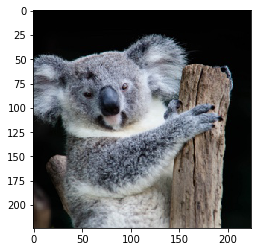

Init image is:  866


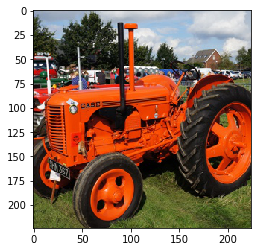

In [3]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# Boundary Untargeted Attack

Adversarial image at step 0. L2 error 42893.992 and class label 411.


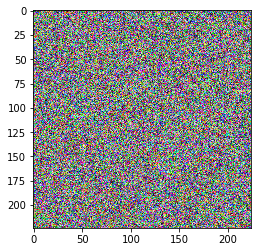

Adversarial image at step 500. L2 error 7893.66 and class label 411.


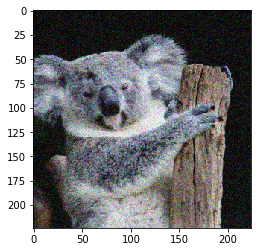

Adversarial image at step 1000. L2 error 5455.0034 and class label 411.


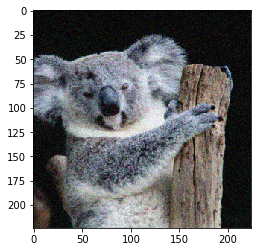

Adversarial image at step 1500. L2 error 4938.6104 and class label 411.


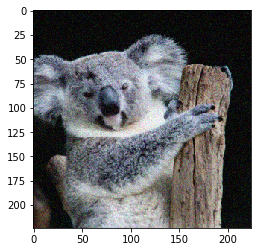

Adversarial image at step 2000. L2 error 4875.9297 and class label 411.


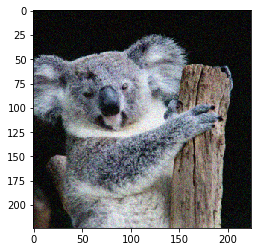

Adversarial image at step 2500. L2 error 3901.4302 and class label 411.


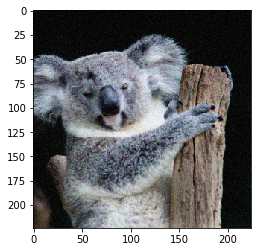

Adversarial image at step 3000. L2 error 3707.4045 and class label 411.


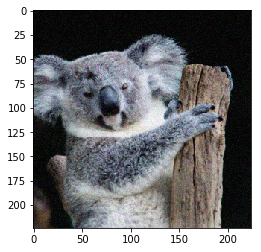

Adversarial image at step 3500. L2 error 3428.7285 and class label 411.


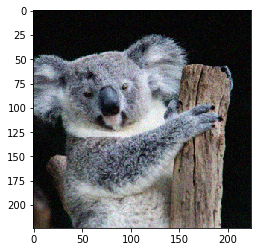

Adversarial image at step 4000. L2 error 3082.728 and class label 411.


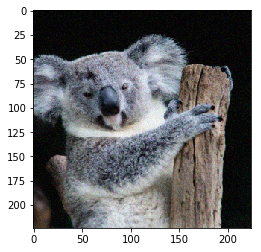

Adversarial image at step 4500. L2 error 2903.2214 and class label 411.


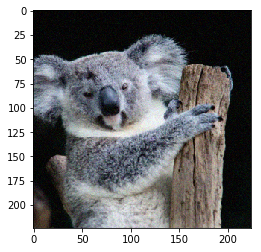

Adversarial image at step 5000. L2 error 2543.8508 and class label 411.


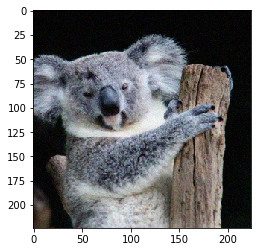

Adversarial image at step 5500. L2 error 2569.459 and class label 411.


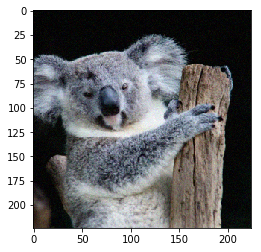

Adversarial image at step 6000. L2 error 2465.3506 and class label 411.


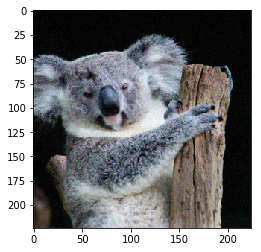

Adversarial image at step 6500. L2 error 2327.7344 and class label 411.


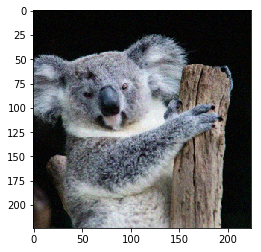

Adversarial image at step 7000. L2 error 2077.888 and class label 411.


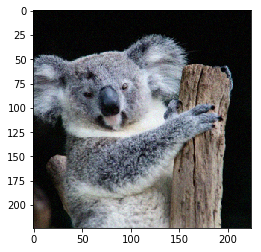

In [4]:
attack = BoundaryAttack(classifier=classifier, targeted=False, max_iter=0, delta=0.0005, epsilon=0.0005)
iter_step = 500
x_adv = None
for i in range(15):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step 
    attack.delta = attack.curr_delta
    attack.epsilon = attack.curr_epsilon

# Boundary Targeted Attack

Adversarial image at step 0. L2 error 44399.297 and class label 866.


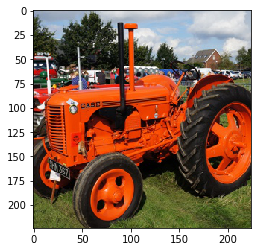

Adversarial image at step 500. L2 error 9386.43 and class label 866.


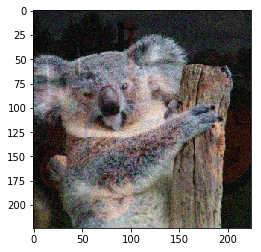

Adversarial image at step 1000. L2 error 5988.273 and class label 866.


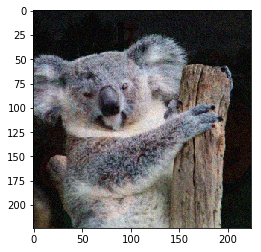

Adversarial image at step 1500. L2 error 4303.282 and class label 866.


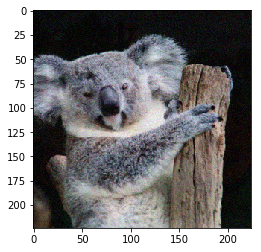

Adversarial image at step 2000. L2 error 3409.3054 and class label 866.


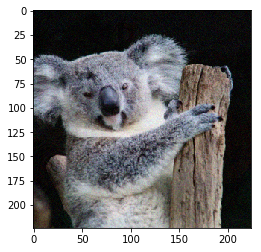

Adversarial image at step 2500. L2 error 2959.9756 and class label 866.


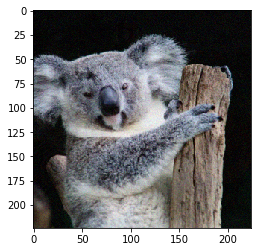

Adversarial image at step 3000. L2 error 2601.8599 and class label 866.


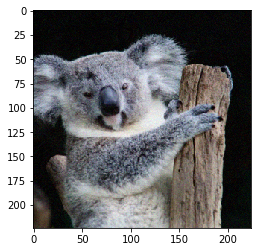

Adversarial image at step 3500. L2 error 2311.322 and class label 866.


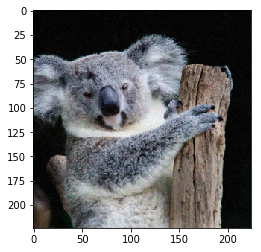

Adversarial image at step 4000. L2 error 2073.3752 and class label 866.


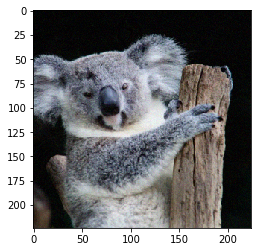

Adversarial image at step 4500. L2 error 1893.4824 and class label 866.


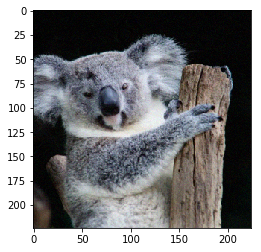

Adversarial image at step 5000. L2 error 1782.1367 and class label 866.


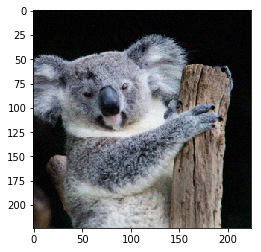

Adversarial image at step 5500. L2 error 1661.2251 and class label 866.


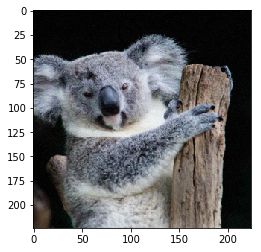

Adversarial image at step 6000. L2 error 1571.4264 and class label 866.


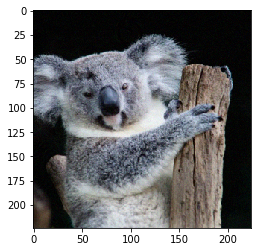

Adversarial image at step 6500. L2 error 1499.6025 and class label 866.


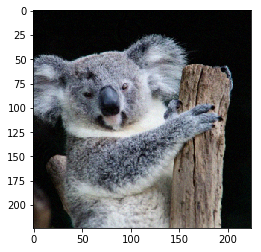

Adversarial image at step 7000. L2 error 1441.8964 and class label 866.


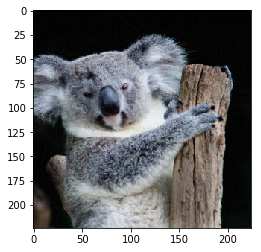

In [5]:
attack = BoundaryAttack(classifier=classifier, targeted=True, max_iter=0, delta=0.0005, epsilon=0.0005)
iter_step = 500 
x_adv = np.array([init_image])
for i in range(15):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step 
    attack.delta = attack.curr_delta
    attack.epsilon = attack.curr_epsilon